**indexing the necessary dataframes and converting to nparrays**

In [126]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

#loading df
file = 'C:/Users/{kr.pA}/Downloads/methylated data/modified.csv'
df = pd.read_csv(file, sep = ',')

#editing df to desired format
df = df.transpose()

df.insert(416349, 416349, ['Patient Number','Patient 3 rep 1', 'Patient 3 rep 1','Patient 3 rep 1','Patient 3 rep 1','Patient 9','Patient 9','Patient 9','Patient 9','Patient 10','Patient 10',
             'Patient 11','Patient 11','Patient 11','Patient 11','Patient 12 rep 1','Patient 12 rep 1','Patient 14','Patient 14','Patient 14 rep 1','Patient 14 rep 1',
             'Patient 1','Patient 1','Patient 1','Patient 1','Patient 2','Patient 2','Patient 2','Patient 2','Patient 3','Patient 3',
             'Patient 3', 'Patient 3','Patient 4', 'Patient 4','Patient 4', 'Patient 4','Patient 7','Patient 7','Patient 7','Patient 7',
             'Patient 8','Patient 8','Patient 8','Patient 8','Patient 9','Patient 9','Patient 10','Patient 10','Patient 12','Patient 12',
             'Patient 14','Patient 14','Patient 15','Patient 15','Patient 15','Patient 15','Patient 16','Patient 16','Patient 16','Patient 16',
             'Patient 18','Patient 18','Patient 18','Patient 18','Patient 19','Patient 19','Patient 19','Patient 19','Patient 20','Patient 20',
             'Patient 20','Patient 20','Patient 21','Patient 21','Patient 21','Patient 21','Patient 22','Patient 22','Patient 22','Patient 22',
             'Patient 26','Patient 26','Patient 26','Patient 26','Patient 28','Patient 28','Patient 28','Patient 28','Patient 29','Patient 29',
             'Patient 29','Patient 29','Patient 29 rep 2','Patient 29 rep 2'], True) 

#populating a list of the genes and the patient number heading to rename the columns and initialize features list
genelist = list(df.iloc[0,0:])

features = genelist[:-1]
df.columns = genelist

#print(genelist)

df = df.drop(['ID_REF'], axis = 0)

#transform and create histograms out of nparray slicing

df_data = df.drop(['Patient Number'], axis =1)
npdata = df_data.to_numpy()

# need to separate out by methylated and unmethylated values
# we do this by deleting even and odd indices

meth = df_data.iloc[::2].to_numpy()
meth = meth.astype('float')
unmeth = df_data.iloc[1::2].to_numpy()
unmeth = unmeth.astype('float')


#***SEPARATING PRIMARY VS RECURRENT***

missing = df.iloc[10:16]

#recur1 = unmeth
#recur2 = meth
#prim1 = unmeth
#prim2 = meth

recurmissing = missing.iloc[2:]

#recurrent

recur1 = df.iloc[3::4]
recur1 = recur1.drop("Patient 11_primary tumour Unmethylated signal")

recur1 = pd.concat([recur1, recurmissing.iloc[1::2]])

recur2 = df.iloc[2::4]
recur2 = recur2.drop("Patient 11_primary tumour Methylated signal")


s = df.iloc[-1:]
recur1 = pd.concat([recur1, s])

xs = df.iloc[-2:-1]
recur2= pd.concat([recur2, xs])
recur2= pd.concat([recur2, recurmissing.iloc[::2]])


#primary

prim1 = df.iloc[1::4]
prim1 = prim1.drop("Patient 11_recurrent tumour Unmethylated signal")
prim1 = prim1.drop("Patient 12_recurrent tumour Unmethylated signal")
prim1 = prim1.drop("Patient 29_recurrent tumour_2 Unmethylated signal")

prim1 = pd.concat([prim1, missing.iloc[1:2]])

prim2 = df.iloc[::4]
prim2 = prim2.drop("Patient 11_recurrent tumour Methylated signal")
prim2 = prim2.drop("Patient 12_recurrent tumour Methylated signal")
prim2 = prim2.drop("Patient 29_recurrent tumour_2 Methylated signal")

prim2= pd.concat([prim2,missing.iloc[0:1]])

#final indexed dataframes for the primary and recurrent data (separated by meth and unmeth within)

primary = pd.concat([prim1,prim2])   
primary = primary.drop(["Patient Number"], axis = 1)
recurrent = pd.concat([recur1, recur2])
recurrent = recurrent.drop(["Patient Number"], axis = 1)
meth = df.iloc[::2]
meth = meth.drop(["Patient Number"], axis = 1)
unmeth = df.iloc[1::2]
unmeth = unmeth.drop(["Patient Number"], axis = 1)


In [127]:
#ndarrays
npdata = npdata.astype('float')
logdata = np.log(npdata)

#dataframes
meth = meth.astype('float')
logmeth = np.log(meth)
unmeth = unmeth.astype('float')
logunmeth = np.log(unmeth)

df_data = df_data.astype('float')
log_data = np.log(df_data)

primary = primary.astype('float')
logprim = np.log(primary)
recurrent = recurrent.astype('float')
logrec = np.log(recurrent)




**WELCH'S T-TEST [methylated v unmethylated]**


In [128]:
import scipy
from scipy import stats


t_stats = scipy.stats.ttest_ind(logmeth, logunmeth, equal_var = False)

t_vals = t_stats[0]
p_vals = t_stats[1]

t_vals = pd.DataFrame(t_vals)
p_vals = pd.DataFrame(p_vals)

compare_t = pd.concat([t_vals, p_vals], axis = 1)
compare_t.columns = [0,1]

names = list(df_data.transpose().index)
namesdict = {i: names[i] for i in range(416349)}

t_methylation = compare_t.rename(index = namesdict, columns={0:"t-statistics", 1:"p-values"}) 
t_methylation

,t-statistics,p-values
cg01707559,-2.072508,4.170903e-02
cg02233190,-5.997820,3.925319e-08
cg02494853,-23.897761,4.257984e-41
cg03244189,-2.943636,4.163493e-03
cg03706273,-31.049490,2.244977e-50
...,...,...
ch.22.734399R,-6.905006,1.907422e-09
ch.22.740407F,-15.407119,3.954460e-25
ch.22.43177094F,-18.801630,7.283064e-33
ch.22.46830341F,-19.897985,8.379001e-34


**WELCH'S T-TEST [primary v recurrent]**


In [129]:
t_stats = scipy.stats.ttest_ind(logprim, logrec, equal_var = False)

t_vals = t_stats[0]
p_vals = t_stats[1]

t_vals = pd.DataFrame(t_vals)
p_vals = pd.DataFrame(p_vals)

compare_t = pd.concat([t_vals, p_vals], axis = 1)
compare_t.columns = [0,1]

names = list(df_data.transpose().index)
namesdict = {i: names[i] for i in range(416349)}

t_stage = compare_t.rename(index = namesdict, columns={0:"t-statistics", 1:"p-values"}) 
t_stage

,t-statistics,p-values
cg01707559,-0.216222,0.829294
cg02233190,-0.767394,0.444818
cg02494853,-0.037689,0.970018
cg03244189,-0.346018,0.730122
cg03706273,-0.152834,0.878874
...,...,...
ch.22.734399R,0.244265,0.807570
ch.22.740407F,0.575124,0.566616
ch.22.43177094F,-0.449803,0.653941
ch.22.46830341F,-0.683873,0.495821


**collecting the statistically significant genes from cross-stage t-test**

In [154]:
#alpha level of 0.5%

significant = []
pfilter = t_stage['p-values'] <= 0.003

for gene in pfilter.index:
    if pfilter[gene] == True:
        significant.append(gene)

        
#signficant subsets of log-transformed total, primary, and recurrent datasets
sig_logprim = logprim[significant]
sig_logrec = logrec[significant]
sig_logdata = pd.concat([sig_logprim, sig_logrec])

#total data with primary on the top and recurrent on the bottom
order_logdata = pd.concat([logprim, logrec])
order_logdata = orderlog_data[significant]


In [136]:
len(significant)

47

**plotting the significant sets via seaborn standard heatmap and dendrogram/cluster heatmap**

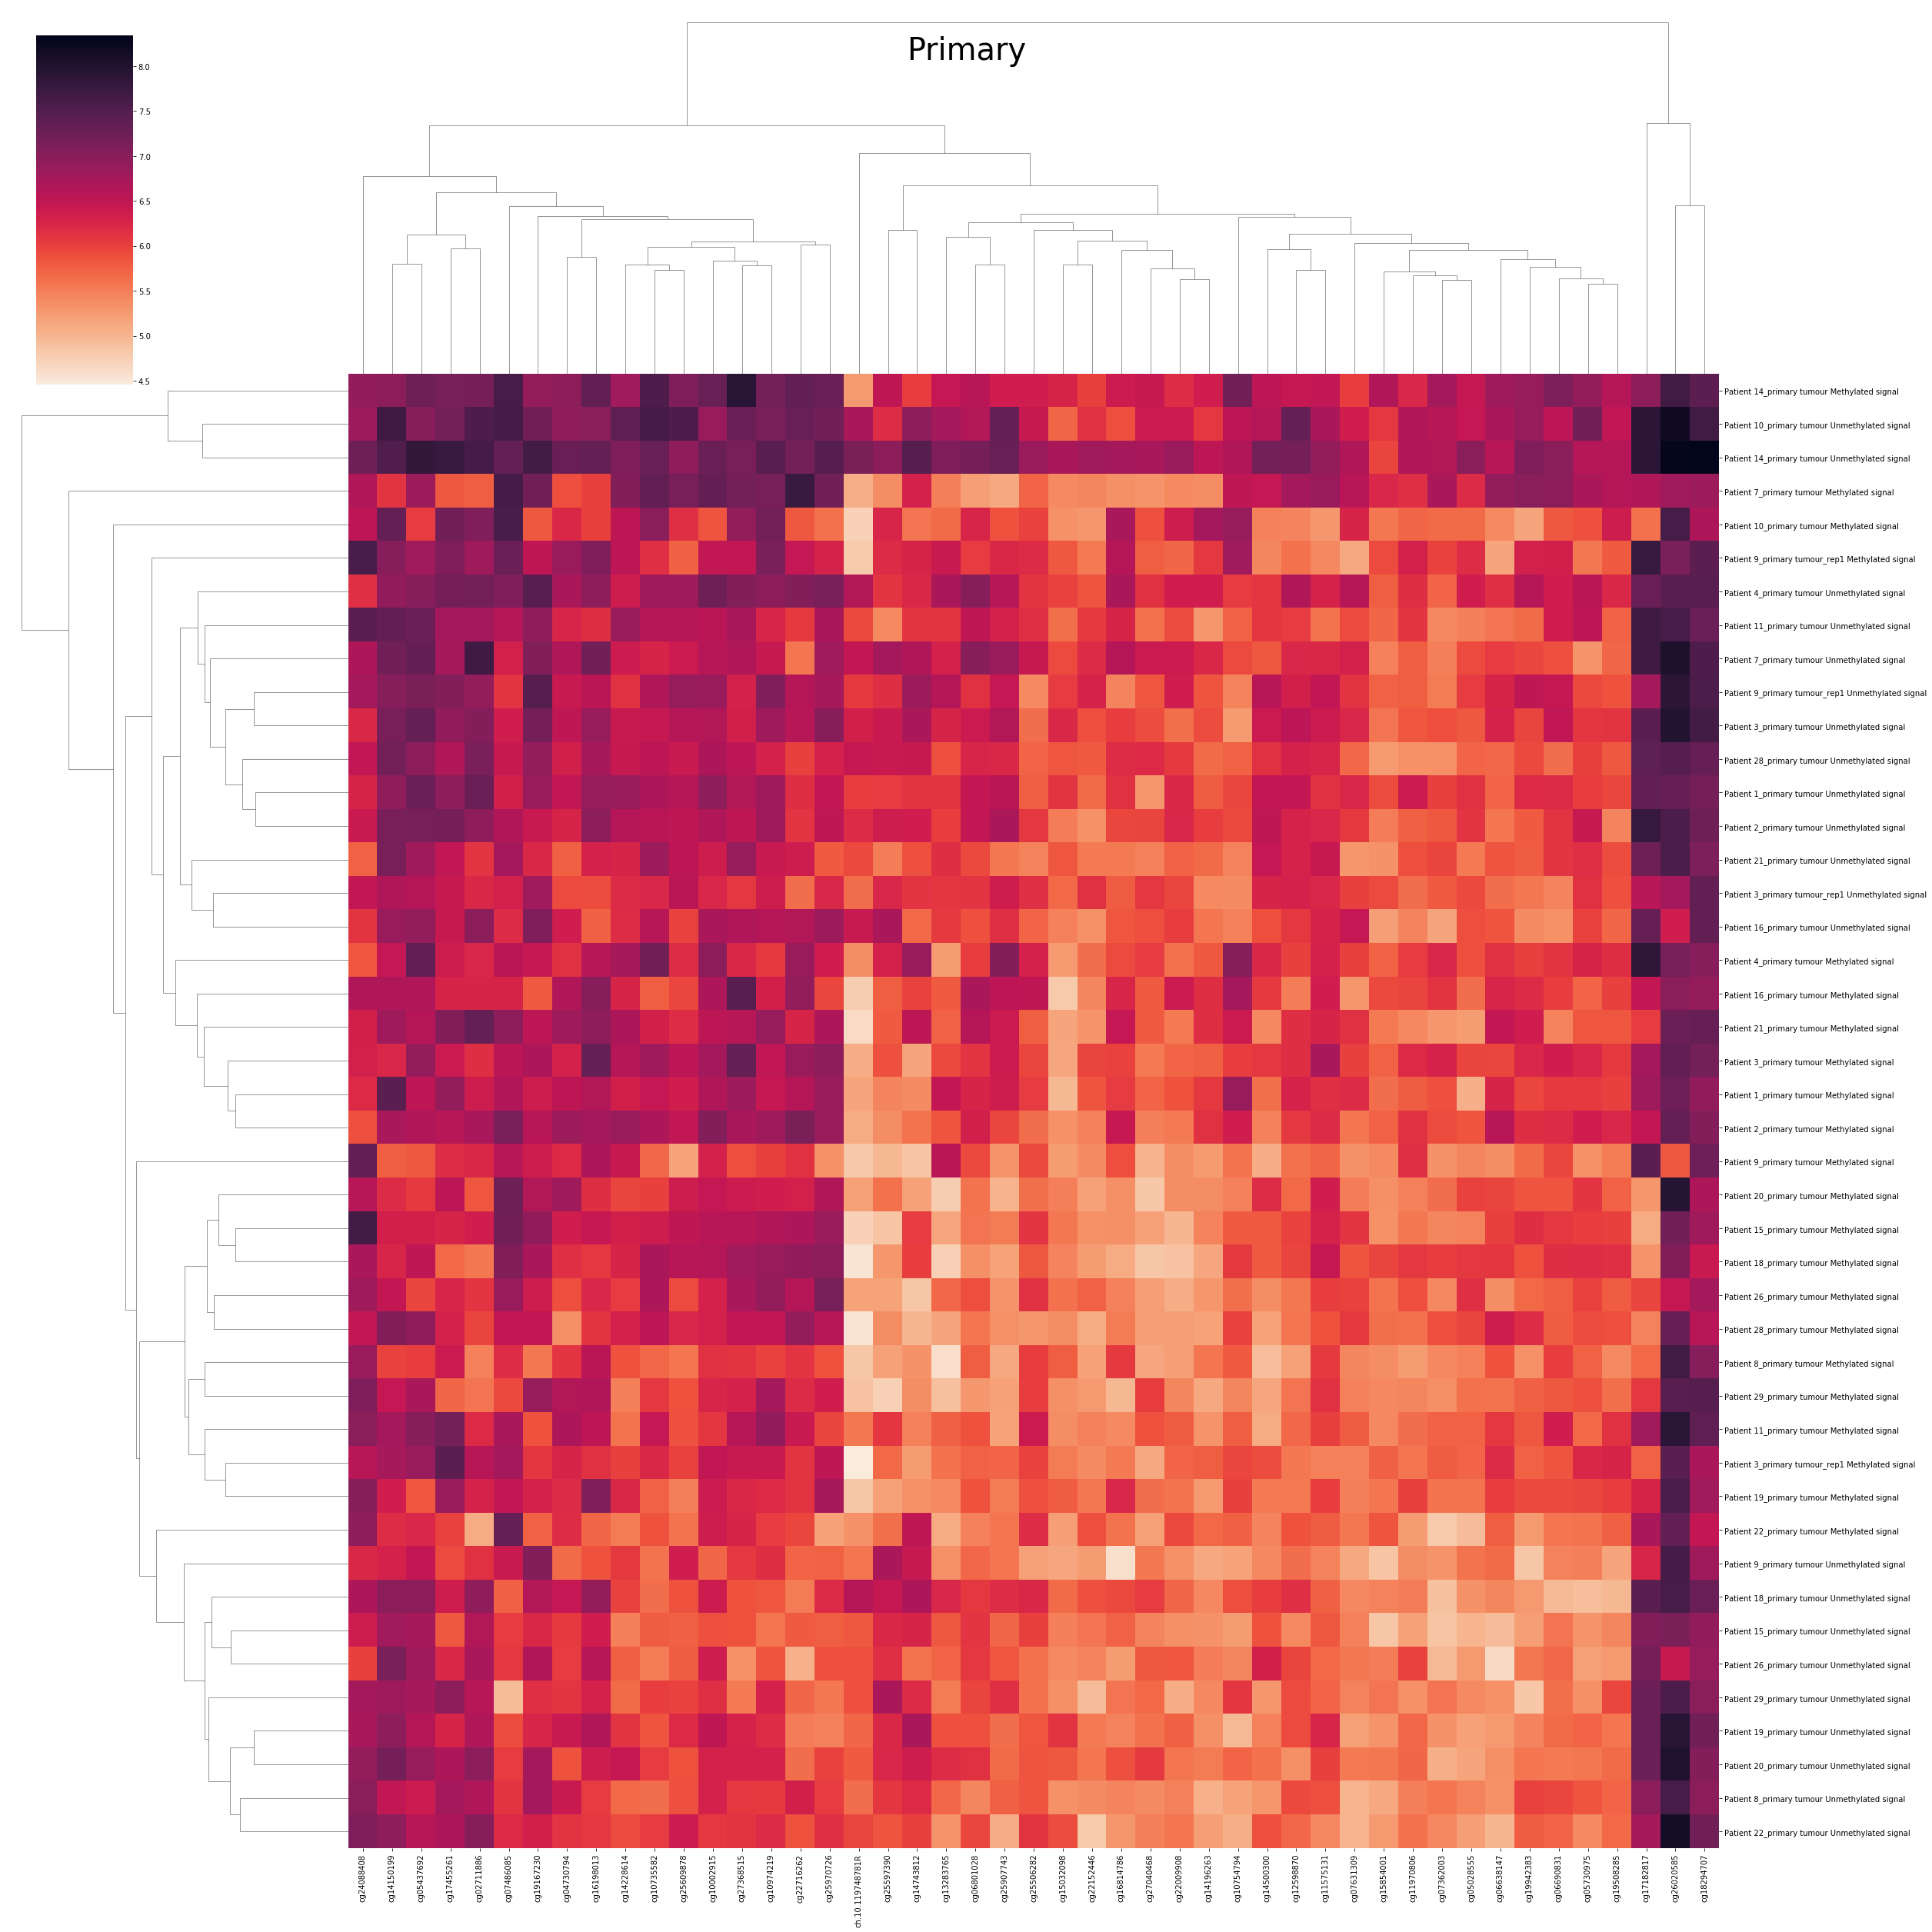

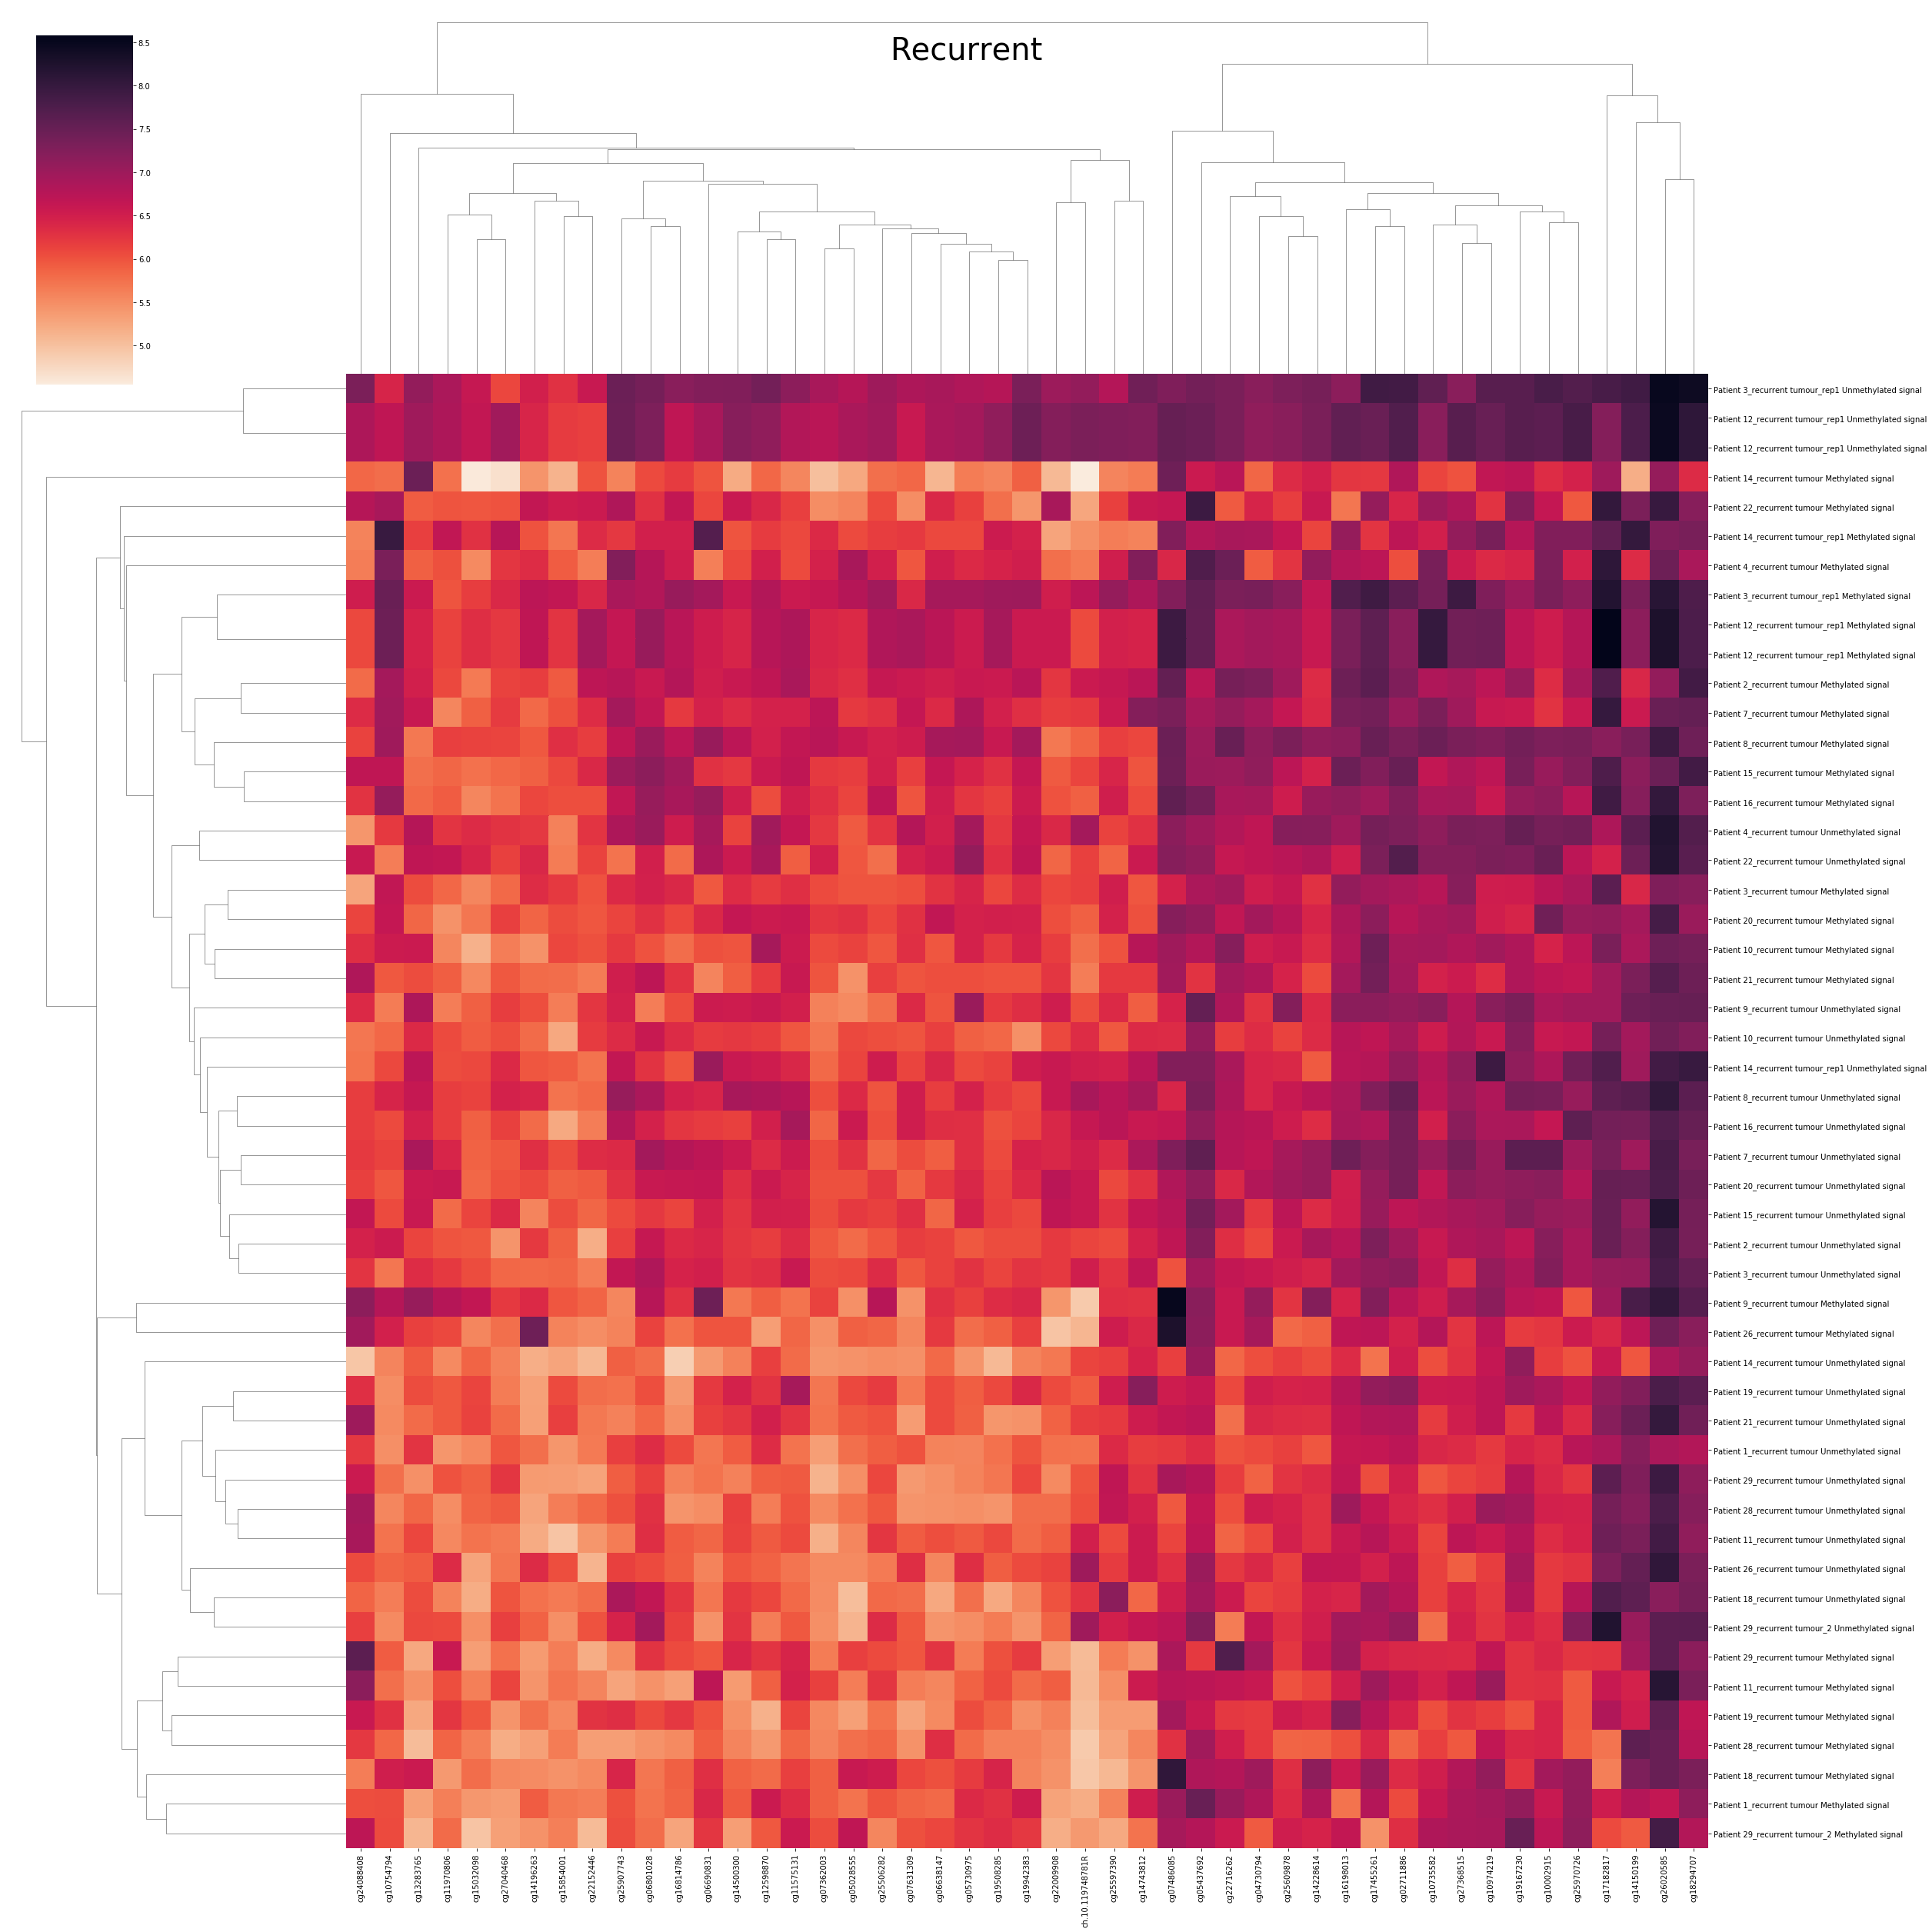

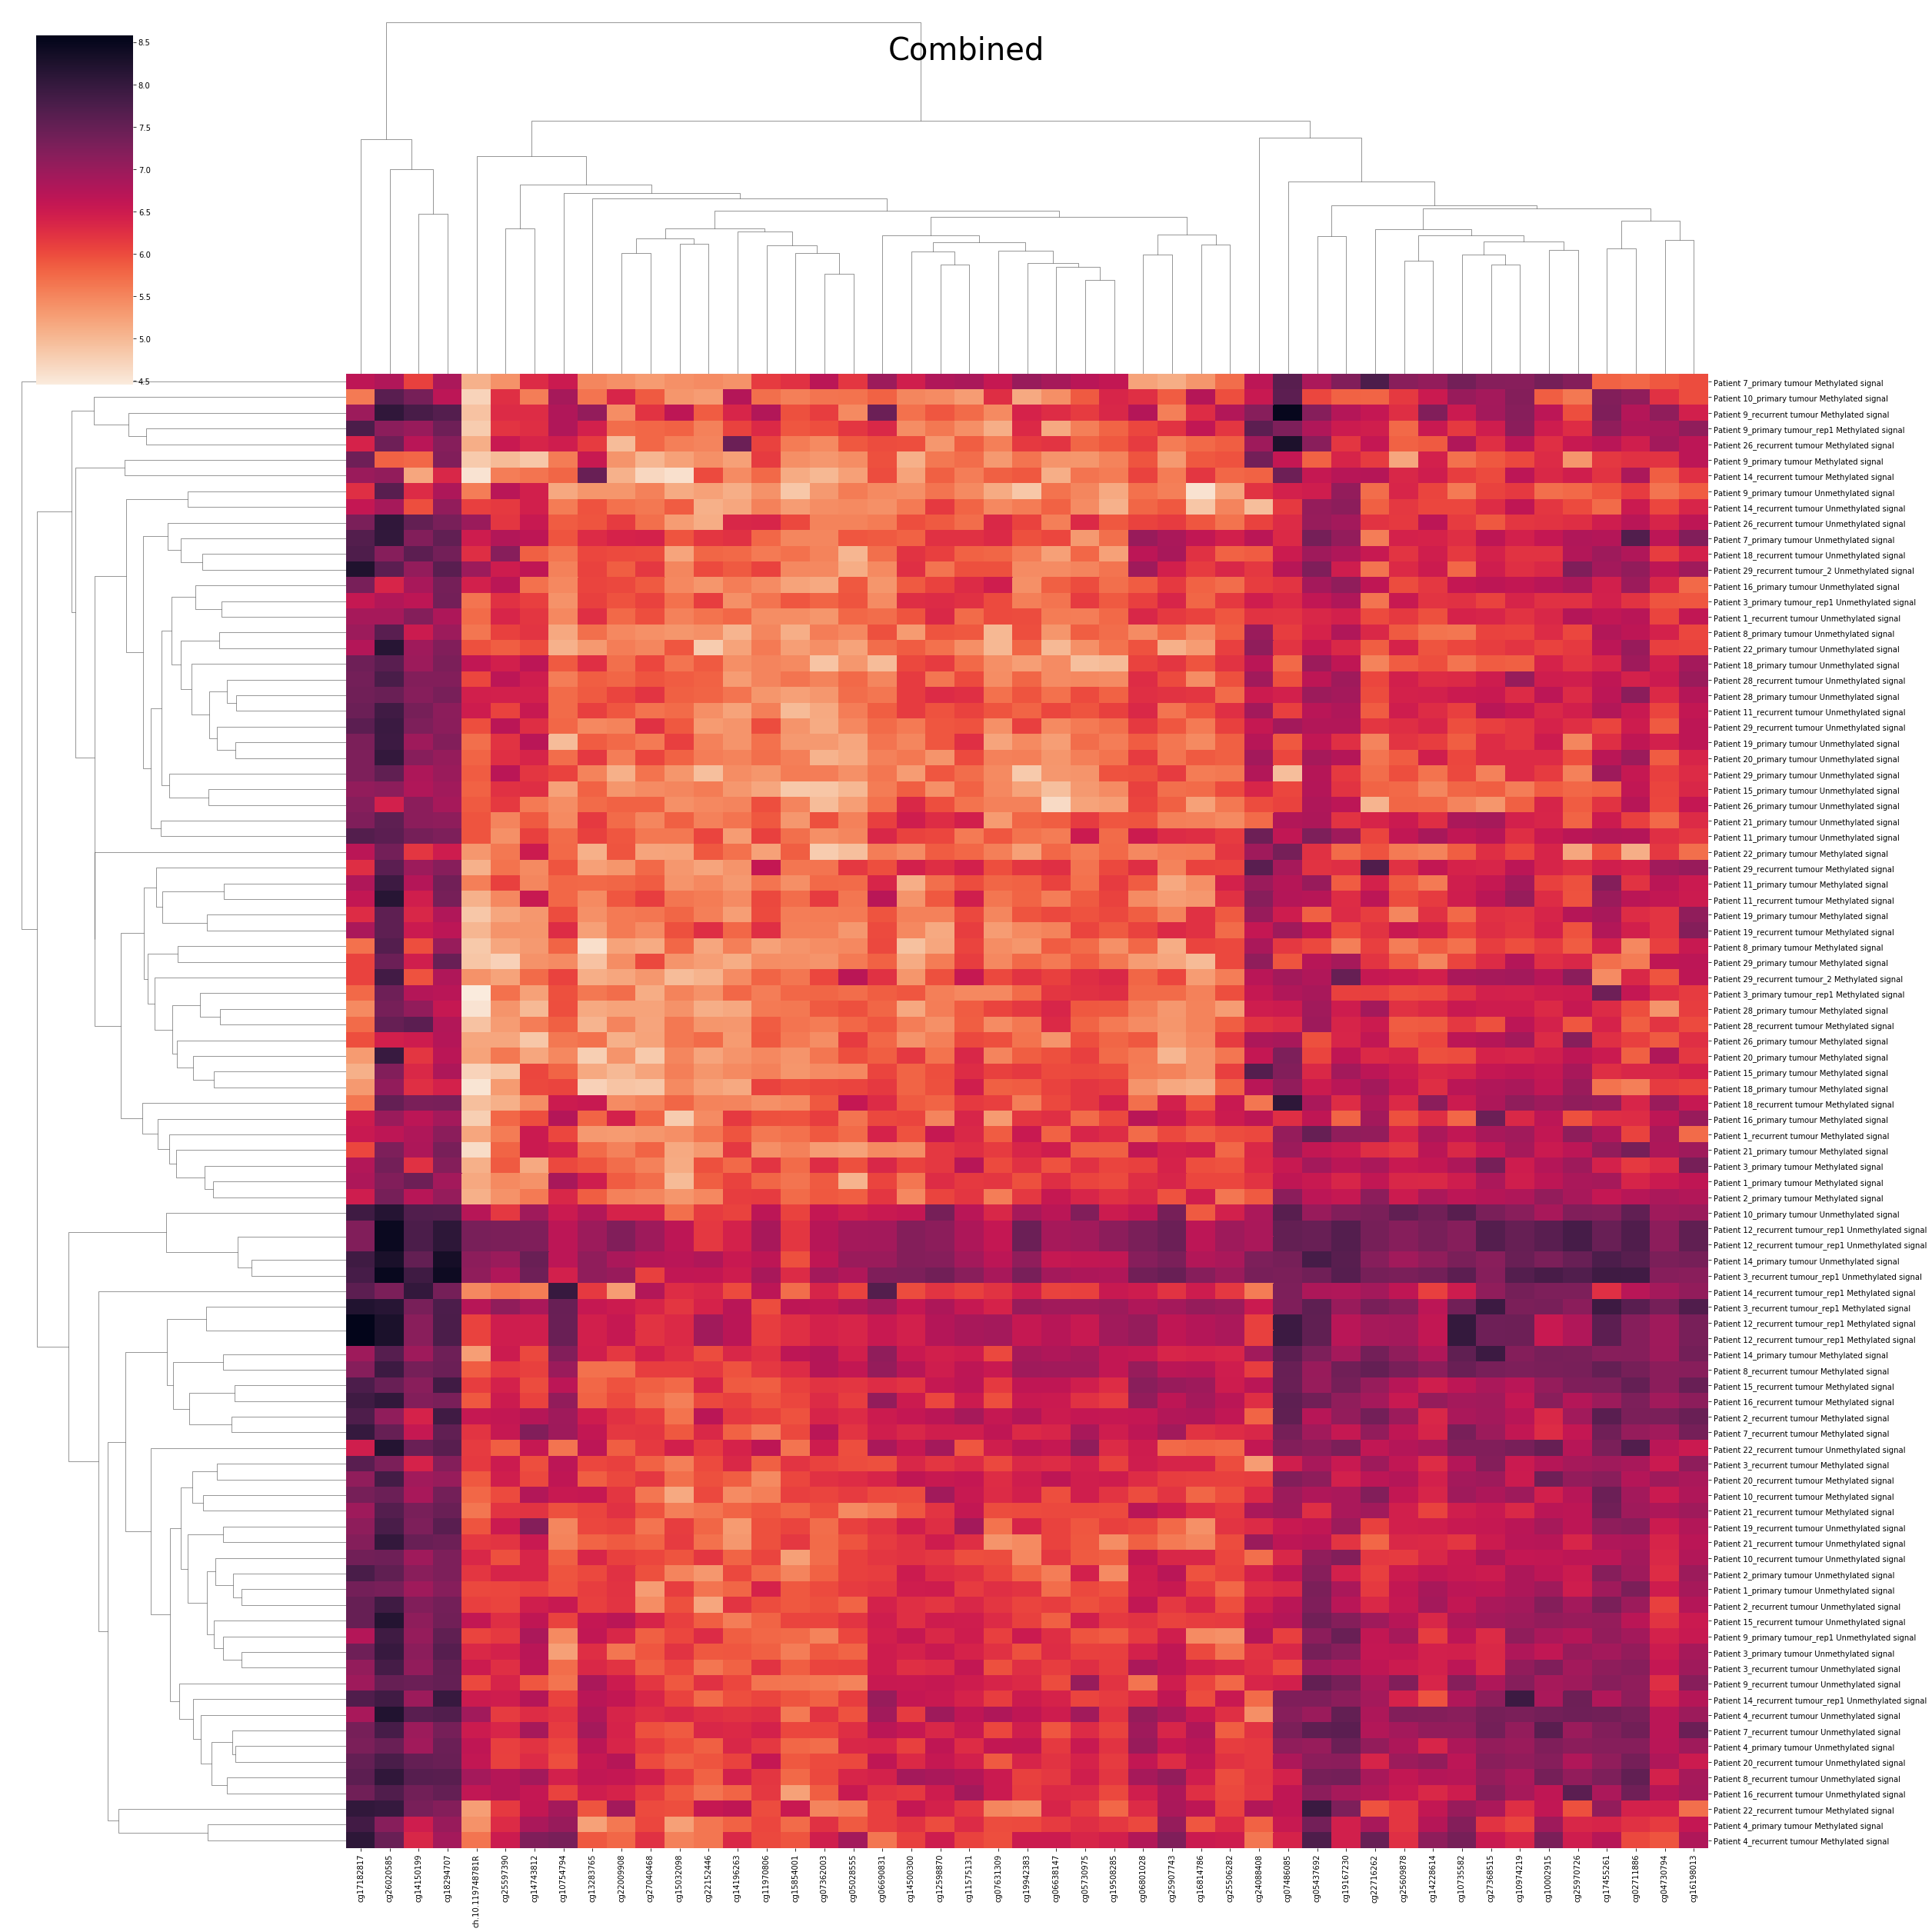

In [222]:
import seaborn as sns
from matplotlib.ticker import FixedFormatter
#b = np.argsort(np.argsort(sig_logprim, axis=1), axis =1)
#im = plt.imshow(b, aspect = 'auto', cmap="coolwarm")

#plt.colorbar(im, ticks = np.array([0.0, 0.5, 1.0])*b.max(), format = FixedFormatter(["low", "middle", "high"]))


#for i in range(sig_logprim.shape[0]):
   # for j in range(sig_logprim.shape[1]):
       # plt.text(j,i,sig_logprim[i,j], ha='center', va='center')
        
#plt.show()

ax = sns.clustermap(sig_logprim, cmap = 'rocket_r', xticklabels = True, yticklabels = True, figsize = (35,35)).fig.suptitle("Primary", fontsize = 40)
ax = sns.clustermap(sig_logrec, cmap = 'rocket_r', xticklabels = True, yticklabels = True, figsize = (35,35)).fig.suptitle("Recurrent", fontsize = 40)
ax = sns.clustermap(order_logdata, cmap = 'rocket_r', xticklabels = True, yticklabels = True, figsize = (35,35)).fig.suptitle("Combined", fontsize = 40)



In [175]:
stages = ['Primary', 'Primary', 'Primary', 'Primary','Primary', 'Primary','Primary', 'Primary','Primary', 'Primary','Primary', 'Primary','Primary', 'Primary','Primary', 'Primary','Primary', 'Primary','Primary', 'Primary','Primary', 'Primary','Primary', 'Primary','Primary', 'Primary','Primary', 'Primary','Primary', 'Primary','Primary', 'Primary','Primary', 'Primary','Primary', 'Primary','Primary', 'Primary','Primary', 'Primary','Primary', 'Primary','Primary', 'Primary', 
          'Recurrent', 'Recurrent', 'Recurrent', 'Recurrent','Recurrent', 'Recurrent','Recurrent', 'Recurrent','Recurrent', 'Recurrent', 'Recurrent', 'Recurrent','Recurrent', 'Recurrent','Recurrent', 'Recurrent','Recurrent', 'Recurrent','Recurrent', 'Recurrent','Recurrent', 'Recurrent','Recurrent', 'Recurrent','Recurrent', 'Recurrent','Recurrent', 'Recurrent','Recurrent', 'Recurrent','Recurrent', 'Recurrent','Recurrent', 'Recurrent','Recurrent', 'Recurrent','Recurrent', 'Recurrent','Recurrent', 'Recurrent','Recurrent', 'Recurrent','Recurrent', 'Recurrent','Recurrent', 'Recurrent','Recurrent', 'Recurrent','Recurrent', 'Recurrent' ]

sig_logdata["Stage"] = stages



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

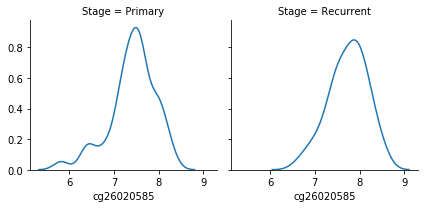

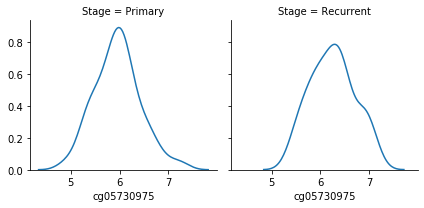

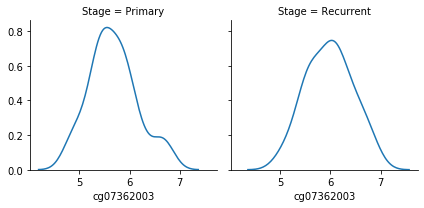

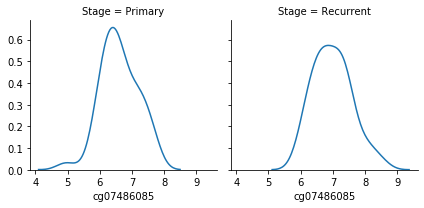

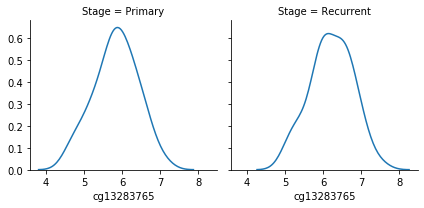

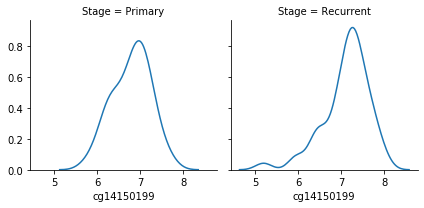

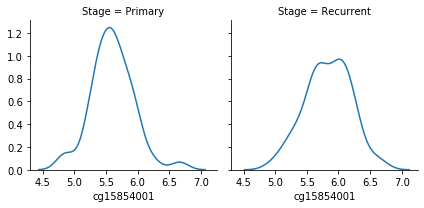

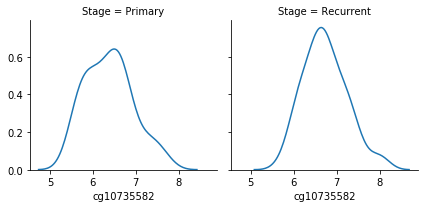

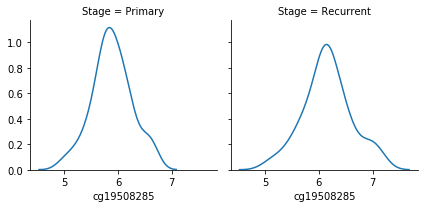

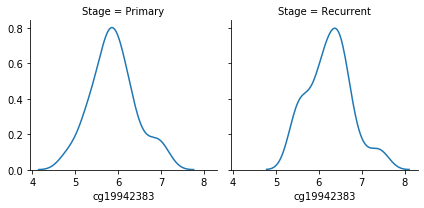

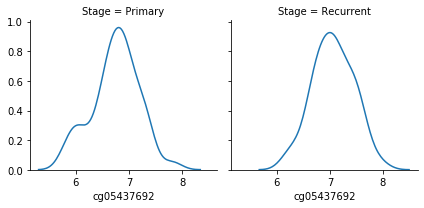

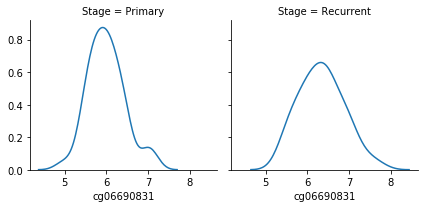

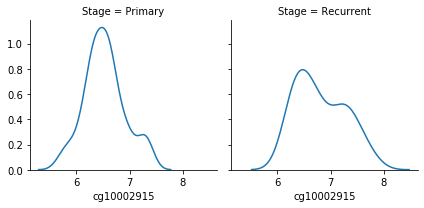

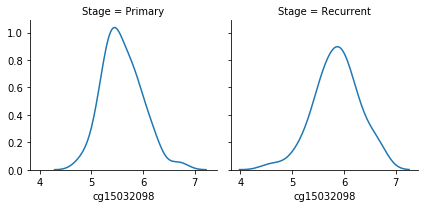

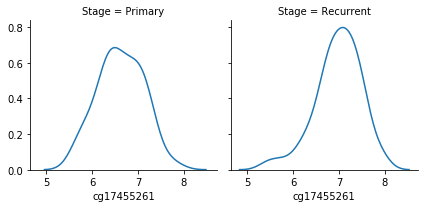

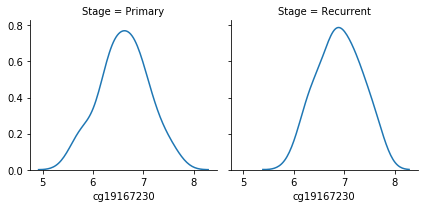

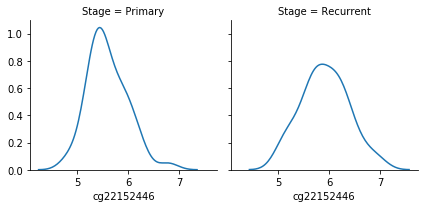

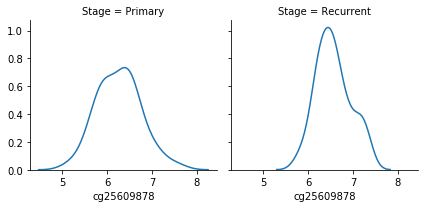

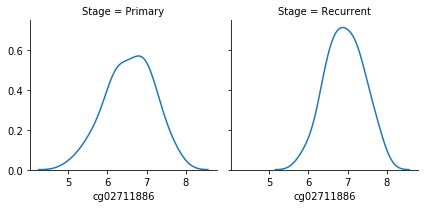

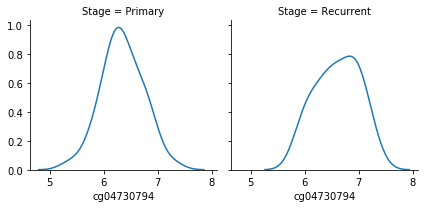

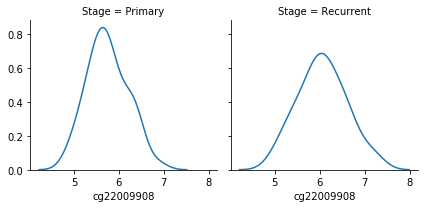

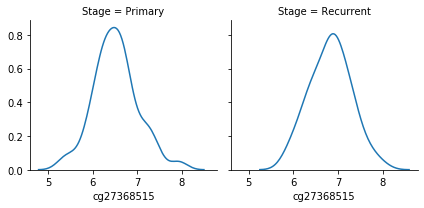

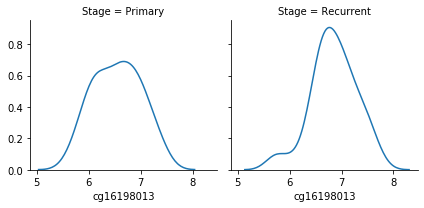

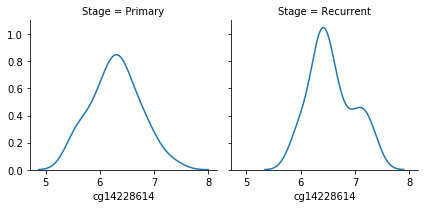

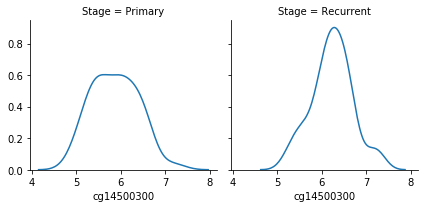

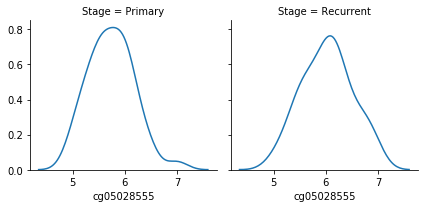

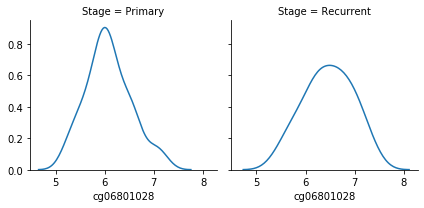

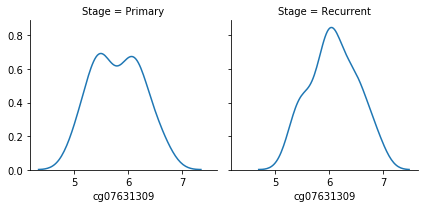

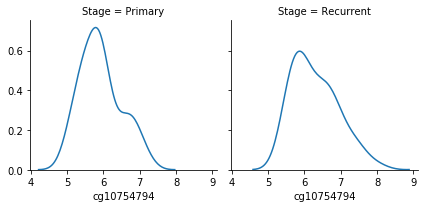

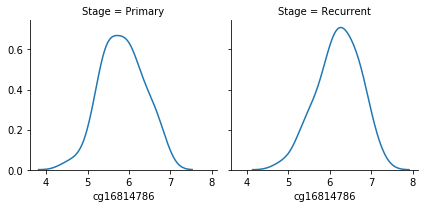

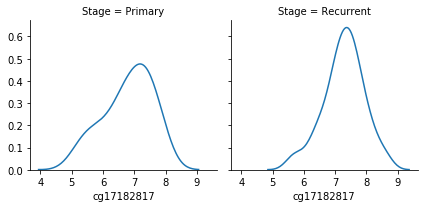

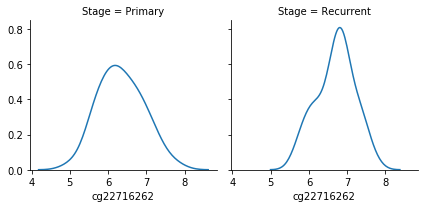

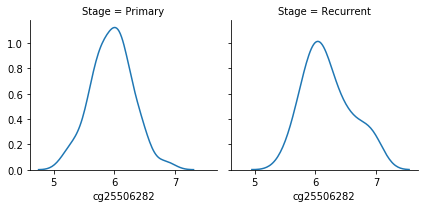

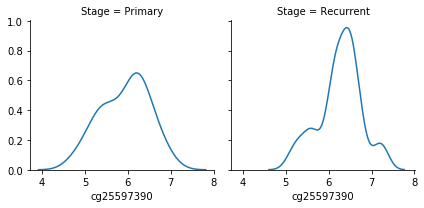

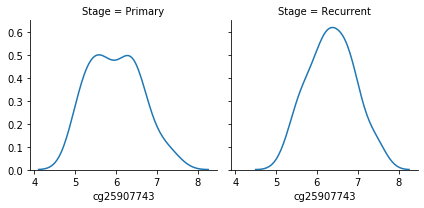

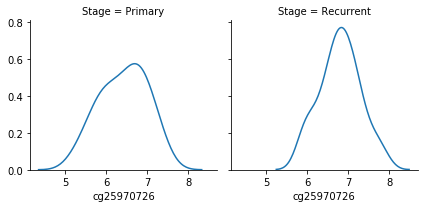

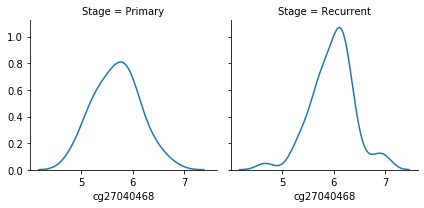

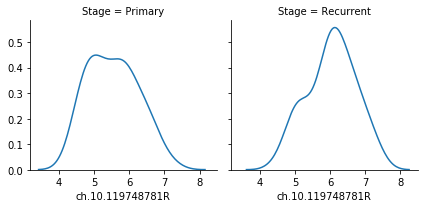

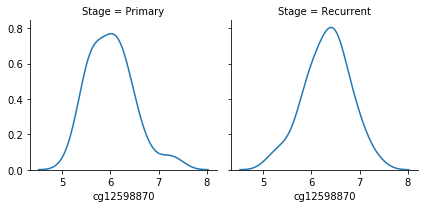

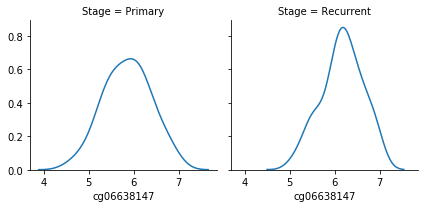

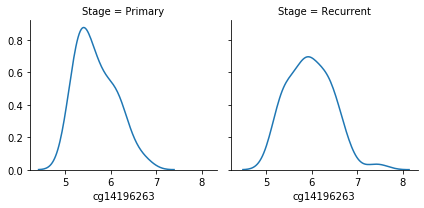

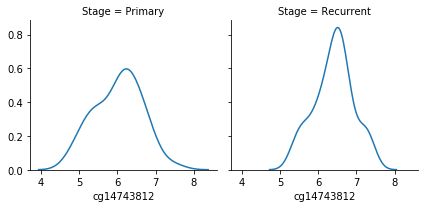

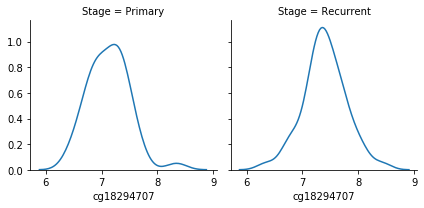

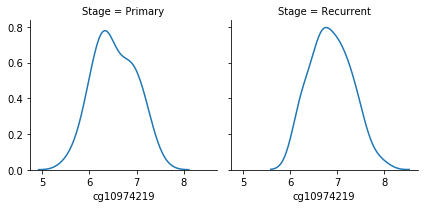

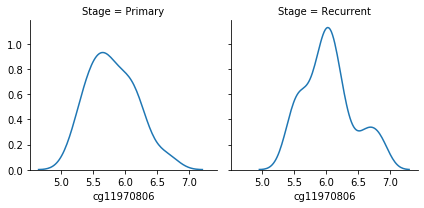

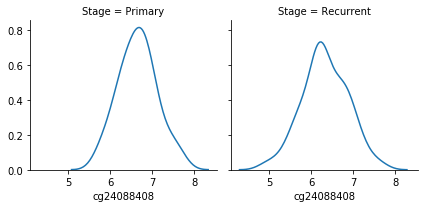

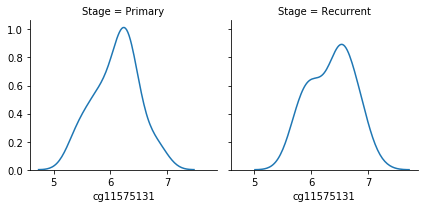

In [218]:
#isin([])
#x-axis = ln(expression), y-axis = frequency of the values


for col in sig_logdata.columns[:-1]:
    g = sns.FacetGrid(sig_logdata, col = "Stage")
    g.map(sns.kdeplot, col)

In [215]:
# need to figure out how to scale heatmap by row/column based on link
# document specific and extensive interpretations of observable patterns
# 

**INTERPRETATIONS**

- kernel density plots for genes are skewed left (more concentrated on higher values) in the recurrent stage compared to the primary stage
- this likely means that in the recurrent stage, individual genes are more actively expressed and therefore produce statistically significantly more proteins
- EXCEPTION: gene 24088408 was the only one that was skewed more to the right in the recurrent stage
- What does this mean for effectiveness of the TMZ treatment between stages?

To do:
- analyze replicate patients?
- scale data by row in seaborn
- check np.argsort heatmap plt above

Publication, presentation? Abstract?